# AST326 lab01
### Maxwell Fine 1004714400

Ex02: Read the two files in your Python code and calculate the mean and standard deviation
of the measurements recorded in each file (so you will have values for “Small” and “Large”
files respectively). Are they consistent with what you expect from a Poisson distribution? The difference between “Small” and “Large” is the integration time wherein the latter has a much longer integration time than the former, so larger count rates in “Large” files than “Small.”

Ex03: Plot the measurements to examine their distributions. First, you can simply plot the
measurements in sequence and then using a histogram (like Figure 1 above). These analyses
and plots need to be done separately for “Small” and “Large” measurements. By glancing the
plots, can you roughly estimate the mean and standard deviation of the two measurements?
Compare the histogram that you created for the “Small” data with what is expected from a
Poisson distribution as Figure 3 above.

In [35]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import poisson as sp_poisson
import scipy.stats as stats


# data fname's
large_f = 'data/Fine-finemaxw-Large.txt'
small_f = 'data/Fine-finemaxw-Small.txt'

In [36]:
# load data

large_data = np.genfromtxt(fname=large_f, dtype=int)
small_data = np.genfromtxt(fname=small_f, dtype=int)

In [172]:
np.std(large_data)

31.4976145763453

In [173]:
np.mean(large_data)

985.174

In [174]:
np.sqrt(985.174)

31.387481581038003

## Ex02

In [37]:
# determination if poisson distribution
# recall for Poisson distributions that std**2 = mean, in real data this is only aproxametly true

def is_poisson_mean(arr, tolerance=0.05):
    # what to use for a 'good' tolerance? 
    # less then 5% error?
    
    mean = np.mean(arr)
    std = np.std(arr)
    
    poisson_test = (mean-std**2) / mean
    
    return poisson_test
    
def is_poisson_std(arr, tolerance=0.05):
    # what to use for a 'good' tolerance? 
    # less then 5% error?
    
    mean = np.mean(arr)
    std = np.std(arr)
    
    poisson_test = (np.sqrt(mean)-std) / std
    
    return poisson_test

In [38]:
is_poisson_mean(large_data, tolerance=0.05)

-0.00702995003928223

In [39]:
is_poisson_std(small_data, tolerance=0.001)  *100

-0.7668334925077578

In [40]:
is_poisson_mean(small_data, tolerance=0.001) *100

-1.551490107688457

### depends on how we measure

what is a good value? how do we justify this? 

In [175]:
(31/1000) *100 #its less then sqrt(n) error is that resonable? 

# I just handwaved this but yadda yadda

3.1

## Ex03

In [206]:
def poisson_pmf(mean, k_array):
    '''returns a Poisson positon mass function for
       the specified mean, and computed over the k_array'''
    
    k= k_array
    mu = mean
    pmf = (mu**k * (np.e**-mu))/ factorial(k)
    
    return pmf



def plot_hist_scatter(data, title1='title', title2='title',
                      save_name1='name.pdf', save_name2='name.pdf'):
    
    # plot hist then scatter, then normalized hist
    
    mean = np.mean(data) #*1000
    std = np.sqrt(mean)
    plt.figure(figsize=(8, 6), dpi=80)
    # smart y lims
    
    
    
    fig1_pmf = sp_poisson
    
    if mean-4*std> 0:
        xmin = mean-4*std
    else:
        xmin = 0
        
    xmax = mean+4*std
    
    my_bins = int(np.sqrt(len(data)))
    
    if title1=='Small Data':
        print(xmax)
        my_bins = int(xmax+1)
    
    hist_parms = plt.hist(data, bins=my_bins, 
                          color='g', label='Data', align='left')
    
    
   
    # plot gaussian
    mu = mean
    sigma = std
    gauss_x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    guass_y = stats.norm.pdf(gauss_x, mu,
                             sigma) 
    h_correct = np.max(hist_parms[0]) / np.max(guass_y)
    plt.fill_between(gauss_x, guass_y * h_correct, alpha=0.4, 
                     label='Gaussian', color='k')
 
    
    # plot data again to go over the Gaussian
    hist_parms = plt.hist(data, bins=my_bins, 
                          color='g', align="left")
    
    # add vertical line for mean
    plt.axvline(mean, color ='k', linestyle=':', label='Mean',linewidth=2)
    
    # calculate scatter possion
    
    # creating a numpy array for x-axis
    x = np.linspace(0, 30, 30)
    print(len(x))
 
    # poisson distribution data for y-axis
    y = sp_poisson.pmf(x, mu=mean, )#loc=10)
   # plt.scatter(x,len(data)*y, color='k', label='Poisson')
    
    if title1=='Small Data':
        print(xmax)
        my_bins = int(xmax+1)
        
        x = np.arange(0, 12, 1)
        
        #print(len(x), 'is is long')
        y = poisson_pmf(mean, x)
        plt.scatter(x,len(data)*y,color='k', label='Poisson')
        
        
    
    
        
    # plot params
    plt.legend(fontsize=15, )
    plt.xlim(xmin, xmax)
    plt.xlabel('Photon Counts', fontsize = 15)
    plt.title(title1 + '\n Histogram', fontsize=15)
    plt.ylabel('Number of Measurements', fontsize = 15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig('figs/' + save_name1 + '_hist.pdf',bbox_inches='tight')
    plt.show()
    plt.close()
    
    # fig 2
    
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(np.arange(0, len(data)), data, color='black') 
    plt.xlabel('Measurments', fontsize=15)
    plt.ylabel('Photon Counts', fontsize=15)
    plt.title(title1 + '\n Scatter Plot', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.savefig('figs/' + save_name2 + '_scatter.pdf',bbox_inches='tight')
    plt.show()
    plt.close()
    
    
    # fig 3
    plt.figure(figsize=(8, 6), dpi=80)
    gauss_x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    guass_y = stats.norm.pdf(gauss_x, mu,
                             sigma) 
    
    hist_parms = plt.hist(data, bins=my_bins, color='g', align="left", density=True,) 
    
    plt.fill_between(gauss_x, guass_y, alpha=0.4, label='Gaussian', color='k')
 
    
    # plot data again to go over the Gaussian
    hist_parms = plt.hist(data, bins=my_bins,color='g', align="left", density=True, label='Data')
    
    
    # add vertical line for mean
    plt.axvline(mean, color ='k', linestyle=':', label='Mean',linewidth=2)
    
    # calculate scatter possion
    
    # creating a numpy array for x-axis
    x = np.linspace(xmin, xmax, my_bins)
    print(len(x))
 
    # poisson distribution data for y-axis
    y = sp_poisson.pmf(x, mu=mean, loc=mean)#loc=10)
    
    if title1=='Small Data':
        print(xmax)
        my_bins = int(xmax+1)
        x = np.arange(0, 12, 1)
        #print(len(x), 'is is long')
        y = poisson_pmf(mean, x)
        plt.scatter(x,y,color='k', label='Poisson')

   # plt.scatter(x,y, color='k', label='Poisson')
    
    # smart y lims
    if mean-4*std> 0:
        xmin = mean-4*std
    else:
        xmin = 0
    plt.legend(fontsize=15, )#bbox_to_anchor=(1.05, 1.))
    xmax = mean+4*std
    plt.xlim(xmin, xmax)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title(title1 + '\n Normalized Histogram', fontsize=15)
    plt.xlabel('Photon Counts', fontsize = 15)
    plt.ylabel('Probability', fontsize = 15)
    plt.savefig('figs/' +save_name1 + 'normal_hist.pdf', bbox_inches='tight')
    
   
    
    
    

11.985996934817377
30
11.985996934817377


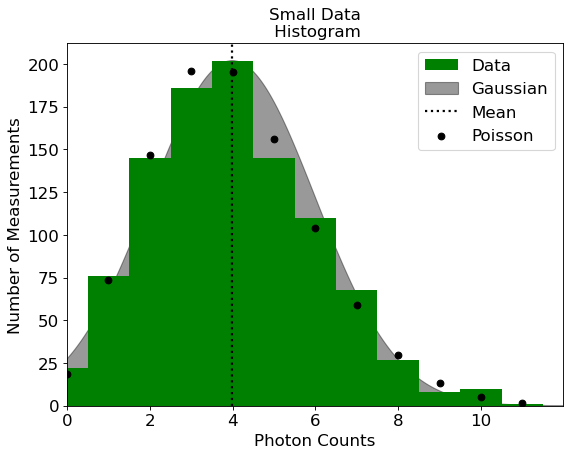

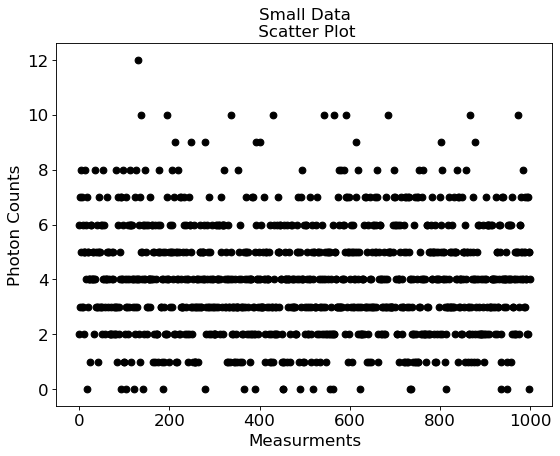

12
11.985996934817377


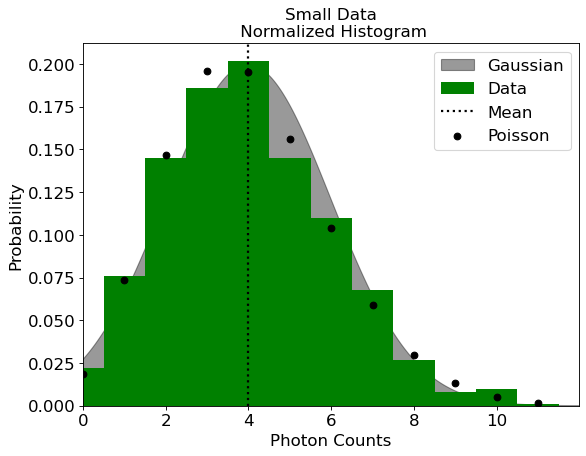

In [207]:
plot_hist_scatter(small_data, title1='Small Data', title2='Small Data',
                      save_name1='small.pdf', save_name2='small.pdf')

In [180]:
np.sqrt(len(large_data))

31.622776601683793

30


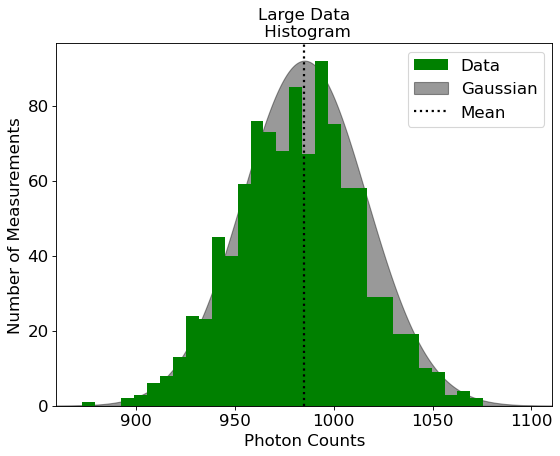

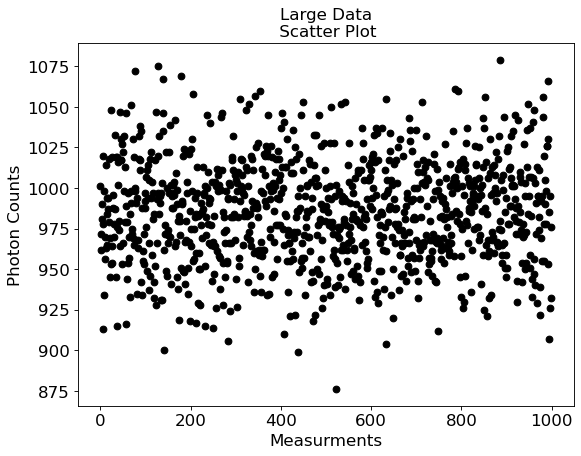

31


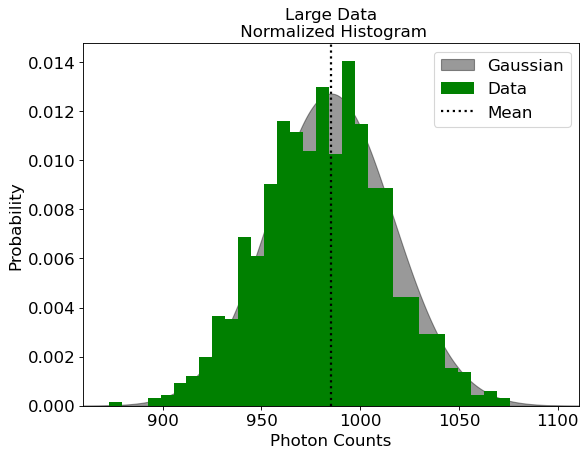

In [181]:
plot_hist_scatter(large_data, title1='Large Data', title2='Large Data',
                      save_name1='large.pdf', save_name2='large.pdf')

In [248]:
len(large_data)

1000